This program plots spinodals for the Flory-Huggins-Potts framework.
The structure of the program:
1. Import all the relevant libraries.
2. Define the `Phase` object. All relevant functions are in Cell [2].
3. Enter all your inputs in the Cell [3].
4. Execute the final cell to see the figure.


In [1]:
# import all the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import time

In [2]:
# relevant functions
zmm   = lambda emma, emmn, pw, T: pw*np.exp (-1/T * emma, dtype=np.float128) + (1-pw)*np.exp (-1/T * emmn, dtype=np.float128)
zms   = lambda emsa, emsn, pw, T: pw*np.exp (-1/T * emsa, dtype=np.float128) + (1-pw)*np.exp (-1/T * emsn, dtype=np.float128)
zss   = lambda essa, essn, pw, T: pw*np.exp (-1/T * essa, dtype=np.float128) + (1-pw)*np.exp (-1/T * essn, dtype=np.float128)
fmma  = lambda emma, emmn, pw, T: pw*np.exp (-1/T * emma, dtype=np.float128)/zmm(emma, emmn, pw, T)
fmsa  = lambda emsa, emsn, pw, T: pw*np.exp (-1/T * emsa, dtype=np.float128)/zms(emsa, emsn, pw, T)
fssa  = lambda essa, essn, pw, T: pw*np.exp (-1/T * essa, dtype=np.float128)/zss(essa, essn, pw, T)


###############################################################
# define the Phase object. Everything will be held inside this Class.
class Phase:

    def __init__ (self, param_list, N):
        self.EMSA   = param_list[0]
        self.EMSN   = param_list[1]
        self.EMMA   = param_list[2]
        self.EMMN   = param_list[3]
        self.ESSA   = param_list[4]
        self.ESSN   = param_list[5]
        self.PV     = param_list[6]
        self.PWMS   = param_list[7]
        self.PWMM   = param_list[8]
        self.PWSS   = param_list[9]
        self.N      = N
        return

    def reset_params (self, param_list):
        self.EMSA   = param_list[0]
        self.EMSN   = param_list[1]
        self.EMMA   = param_list[2]
        self.EMMN   = param_list[3]
        self.ESSA   = param_list[4]
        self.ESSN   = param_list[5]
        self.PV     = param_list[6]
        self.PWMS   = param_list[7]
        self.PWMM   = param_list[8]
        self.PWSS   = param_list[9]
        return

    def print_params (self):
        print (f"The parameters of this curve are EMSA = {self.EMSA}, EMSN = {self.EMSN}, EMMA = {self.EMMA}, EMMN = {self.EMMN}, ESSA = {self.ESSA}, ESSN = {self.ESSN}, \
PV = {self.PV}, PWMS = {self.PWMS}, PWMM = {self.PWMM}, PWSS = {self.PWSS}", flush=True)
        return

    def chi (self, T):
        c = 24 * (self.PV * ( (fmsa (self.EMSA, self.EMSN, self.PWMS, T) * self.EMSA + (1 - fmsa (self.EMSA, self.EMSN, self.PWMS, T) ) * self.EMSN) - 1/2 * \
        ( (fmma (self.EMMA, self.EMMN, self.PWMM, T) * self.EMMA + (1-fmma (self.EMMA, self.EMMN, self.PWMM, T) ) * self.EMMN) + \
          (fssa (self.ESSA, self.ESSN, self.PWSS, T) * self.ESSA + (1-fssa (self.ESSA, self.ESSN, self.PWSS, T) ) * self.ESSN) ) )
        + (1-self.PV) * (self.EMSN - 1/2 * (self.EMMN + self.ESSN) ) ) / T

        return np.array(c, dtype=np.float128)

    def spinodal (self, T):
        p1 = -1/(4 * self.N * self.chi (T)) * (-1 + self.N - 2 * self.N * self.chi (T) - np.sqrt (-8 * self.N * self.chi (T) + (1 - self.N + 2 * self.N * self.chi (T) ) ** 2 ) )
        p2 = -1/(4 * self.N * self.chi (T)) * (-1 + self.N - 2 * self.N * self.chi (T) + np.sqrt (-8 * self.N * self.chi (T) + (1 - self.N + 2 * self.N * self.chi (T) ) ** 2 ) )
        return (np.array(p1, dtype=np.float128), np.array(p2, dtype=np.float128), T)

    def delta_phi (self, T):
        p1 = -1/(4 * self.N * self.chi (T)) * (-1 + self.N - 2 * self.N * self.chi (T) - np.sqrt (-8 * self.N * self.chi (T) + (1 - self.N + 2 * self.N * self.chi (T) ) ** 2 ) )
        p2 = -1/(4 * self.N * self.chi (T)) * (-1 + self.N - 2 * self.N * self.chi (T) + np.sqrt (-8 * self.N * self.chi (T) + (1 - self.N + 2 * self.N * self.chi (T) ) ** 2 ) )
        return p1 - p2


# end of class Phase
###############################################################

In [3]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#~~~~~~~~ ENTER YOUR INPUTS HERE ~~~~~~~~~~~~
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
EMSA = -0.499        # E_MS (aligned) = E_MSN + Delta_MS
EMSN = 0             # E_MS (not aligned)
EMMA = -1            # E_MM (aligned) = E_MMN + Delta_MM
EMMN = -1            # E_MM (not aligned)
ESSA = 0             # E_SS (aligned) = E_SSN + Delta_SS
ESSN = 0             # E_SS (not aligned)
PV   = 1             # P_V
PW   = 0.25          # P_Omega
DOP  = 32            # degree of polymerization, or N
rgba_color = "coral" # color of spinodal curve

The parameters of this curve are EMSA = -0.499, EMSN = 0, EMMA = -1, EMMN = -1, ESSA = 0, ESSN = 0, PV = 1, PWMS = 0.25, PWMM = 0.25, PWSS = 0.25


<ipython-input-2-043a67257d19>:55: RuntimeWarning: invalid value encountered in sqrt
  p1 = -1/(4 * self.N * self.chi (T)) * (-1 + self.N - 2 * self.N * self.chi (T) - np.sqrt (-8 * self.N * self.chi (T) + (1 - self.N + 2 * self.N * self.chi (T) ) ** 2 ) )
<ipython-input-2-043a67257d19>:56: RuntimeWarning: invalid value encountered in sqrt
  p2 = -1/(4 * self.N * self.chi (T)) * (-1 + self.N - 2 * self.N * self.chi (T) + np.sqrt (-8 * self.N * self.chi (T) + (1 - self.N + 2 * self.N * self.chi (T) ) ** 2 ) )


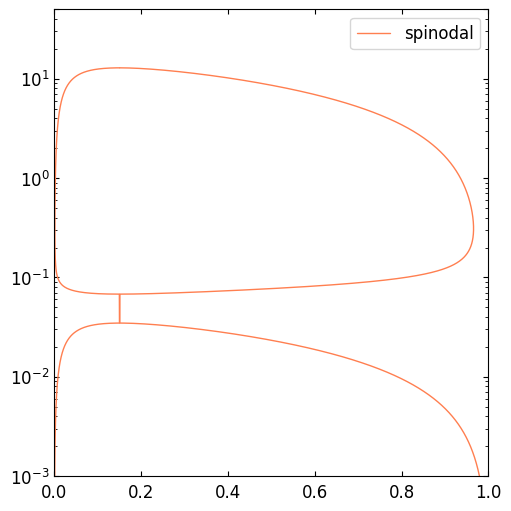

Elapsed time is 137.7254889011383 seconds.


In [4]:
# start the timer
start = time.time()
lsize = 12
fdict = {'color':  'black',
    'weight': 'normal',
    'size': lsize}

# set up the inputs for the Phase object
energy_param_list  = [EMSA, EMSN, EMMA, EMMN, ESSA, ESSN, PV, PW, PW, PW] # all pw's are held the same

# define the phase object
PhaseDiag          = Phase (energy_param_list, DOP)

# set up the temperature vector
T                  = np.hstack((np.logspace (-3, np.log10(30), int(1e+7) ), np.linspace (0.05,0.15, int(1e+6)), np.linspace (0.1, 1.0, int(1e+6) ) ) )
T                  = np.sort (T, kind="mergesort")

# start setting up the figures from matplotlib
plt.figure(figsize=(5,5), constrained_layout=True)
plt.tick_params(direction='in', bottom=True, top=True, left=True, right=True, which='both')
plt.tick_params(axis='x', labelsize=lsize, pad=5)
plt.tick_params(axis='y', labelsize=lsize)

# just print things out
PhaseDiag.print_params()

# get the spinodal

# section for the first arm of the spinodal...
spinodal = PhaseDiag.spinodal (T)
T1       = spinodal[2][spinodal[0] < 1]
arm1     = spinodal[0][spinodal[0] < 1]
T1       = T1  [arm1 > 0]
arm1     = arm1[arm1 > 0]
plt.plot(arm1, T1, lw=1.0, markersize=0, c=rgba_color, solid_capstyle="round",label="_nolabel_")

# section for the second arm of the spinodal...
T1       = spinodal[2][spinodal[1] < 1]
arm1     = spinodal[1][spinodal[1] < 1]
T1       = T1  [arm1 > 0]
arm1     = arm1[arm1 > 0]
plt.plot  (arm1, T1, lw=1.0, markersize=0, color=rgba_color, solid_capstyle="round", label="spinodal")

# making the plots prettier...
plt.legend (loc="upper right", fontsize=12)
plt.yscale ("log")
plt.ylim (1e-3, 50)
plt.xlim (0, 1)

plt.yticks ([0.001, 0.01, 0.1, 1.0, 10, 50])
plt.xticks ([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.show()

# print how long this computation took
stop = time.time()
print (f"Elapsed time is {stop-start} seconds.", flush=True)
